In [1]:
# Carrega as biliotecas necessárias
%run '~/git/Bibliotecas.ipynb'
# Carrega a tabela de chuvas
chuvas_m_r_pa=pd.read_csv('~/git/comex_sh_mun/temp/chuvas_m_r_pa.csv')

In [2]:
chuvas_m_r_pa[['Data','DATA (YYYY-MM-DD)']].sort_values('Data')

,Data,DATA (YYYY-MM-DD)
422016,2019/01/01,NaN
439558,2019/01/01,NaN
439557,2019/01/01,NaN
439556,2019/01/01,NaN
439555,2019/01/01,NaN
...,...,...
422011,NaN,2018-12-31
422012,NaN,2018-12-31
422013,NaN,2018-12-31
422014,NaN,2018-12-31


In [3]:
chuvas_m_r_pa['Data']=chuvas_m_r_pa['Data'].astype(str)+chuvas_m_r_pa['DATA (YYYY-MM-DD)'].astype(str)

In [4]:
chuvas_m_r_pa[['Estação','Data', 'DATA (YYYY-MM-DD)', 'Hora UTC','HORA (UTC)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']].sort_values(by=['Data'])

,Estação,Data,DATA (YYYY-MM-DD),Hora UTC,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
422016,CONCEICAO DAS ALAGOAS,2019/01/01nan,NaN,0000 UTC,NaN,0
439558,CALDAS,2019/01/01nan,NaN,2200 UTC,NaN,0
439557,CALDAS,2019/01/01nan,NaN,2100 UTC,NaN,0
439556,CALDAS,2019/01/01nan,NaN,2000 UTC,NaN,0
439555,CALDAS,2019/01/01nan,NaN,1900 UTC,NaN,0
...,...,...,...,...,...,...
404491,CONCEICAO DAS ALAGOAS,nan2018-12-31,2018-12-31,NaN,19:00,0
404492,CONCEICAO DAS ALAGOAS,nan2018-12-31,2018-12-31,NaN,20:00,0
404493,CONCEICAO DAS ALAGOAS,nan2018-12-31,2018-12-31,NaN,21:00,0
404495,CONCEICAO DAS ALAGOAS,nan2018-12-31,2018-12-31,NaN,23:00,0


In [5]:
chuvas_m_r_pa.Data=pd.to_datetime(chuvas_m_r_pa.Data.str.replace('nan','').sort_values(),format='mixed')

In [6]:
chuvas_m_r_pa=chuvas_m_r_pa.drop(columns=['DATA (YYYY-MM-DD)'])

In [7]:
chuvas_m_r_pa.Data=pd.to_datetime(chuvas_m_r_pa.Data)
chuvas_m_r_pa['CO_ANO']=chuvas_m_r_pa.Data.dt.year
chuvas_m_r_pa['CO_MES']=chuvas_m_r_pa.Data.dt.month
chuvas_m_r_pa=chuvas_m_r_pa.sort_values('Data')
chuvas_m_r_pa[['CO_ANO','Estação']].drop_duplicates().head(10)

,CO_ANO,Estação
206830,2006,CONCEICAO DAS ALAGOAS
210839,2006,CALDAS
119158,2007,CALDAS
105192,2007,CONCEICAO DAS ALAGOAS
113971,2007,PASSA QUATRO
145474,2008,CALDAS
136682,2008,PASSA QUATRO
127918,2008,CONCEICAO DAS ALAGOAS
163026,2009,PASSA QUATRO
171790,2009,CALDAS


Podemos ver acima que a estação Passa Quatro não apresenta registro no ano de 2006. Por isso, esse ano será eleiminado da tabela.

In [8]:
chuvas_m_r_pa=chuvas_m_r_pa[chuvas_m_r_pa.CO_ANO>2006]

In [9]:
chuvas_m_r_pa[chuvas_m_r_pa.CO_ANO==2007][['CO_MES','Estação']].drop_duplicates().head(15)

,CO_MES,Estação
119158,1,CALDAS
105192,1,CONCEICAO DAS ALAGOAS
105951,2,CONCEICAO DAS ALAGOAS
119880,2,CALDAS
120564,3,CALDAS
106609,3,CONCEICAO DAS ALAGOAS
121301,4,CALDAS
107352,4,CONCEICAO DAS ALAGOAS
108074,5,CONCEICAO DAS ALAGOAS
122039,5,CALDAS


Podemos ver acima que a estação Passa Quatro só iniciou os registros no mês 5. Por tanto, como o objetvo do projeto é prever importação por ano regular, todo o ano de 2007 será descratado.

In [10]:
chuvas_m_r_pa=chuvas_m_r_pa[(chuvas_m_r_pa.CO_ANO>2007)]
chuvas_m_r_pa

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,Estação,HORA (UTC),RADIACAO GLOBAL (KJ/m²),CO_ANO,CO_MES
145474,2008-01-01,NaN,0,895,895,"894,7",NaN,"19,3","16,3","19,3",...,83.0,32.0,"1,4",",1",NaN,CALDAS,10:00,"629,4",2008,1
145473,2008-01-01,NaN,-9999,-9999,-9999,-9999,NaN,-9999,-9999,-9999,...,-9999.0,-9999.0,-9999,-9999,NaN,CALDAS,09:00,-9999,2008,1
145472,2008-01-01,NaN,0,"894,3","894,3","893,8",NaN,"15,4","14,6","16,1",...,95.0,349.0,"1,6",0,NaN,CALDAS,08:00,-9999,2008,1
145467,2008-01-01,NaN,0,"894,1","894,3","893,9",NaN,"18,7","14,2","19,3",...,75.0,166.0,"4,7",",2",NaN,CALDAS,03:00,-9999,2008,1
145470,2008-01-01,NaN,0,"893,6","893,7","893,3",NaN,16,"14,8","16,7",...,92.0,137.0,0,0,NaN,CALDAS,06:00,-9999,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43851,2023-12-31,0300 UTC,0,"900,1",901,"900,1",NaN,"17,9",16,"18,4",...,89.0,158.0,"7,8","2,7",NaN,PASSA QUATRO,NaN,NaN,2023,12
43850,2023-12-31,0200 UTC,0,901,"901,2","900,8",NaN,"18,4","16,5","18,9",...,89.0,198.0,"9,6","2,9",NaN,PASSA QUATRO,NaN,NaN,2023,12
43849,2023-12-31,0100 UTC,0,"900,9","900,9","900,4",NaN,"18,7","17,1","19,1",...,90.0,172.0,"11,6","3,7",NaN,PASSA QUATRO,NaN,NaN,2023,12
43858,2023-12-31,1000 UTC,0,"900,5","900,5","899,5","260,1","18,2","15,6","18,2",...,84.0,170.0,"11,5","3,3",NaN,PASSA QUATRO,NaN,NaN,2023,12


In [11]:
chuvas_m_r_pa['Hora']=chuvas_m_r_pa['Hora UTC'].astype(str)+chuvas_m_r_pa['HORA (UTC)'].astype(str)
chuvas_m_r_pa['Hora']=chuvas_m_r_pa['Hora'].str.replace('nan','')
chuvas_m_r_pa['Hora']=chuvas_m_r_pa['Hora'].str.replace(' (UTC)','')
chuvas_m_r_pa['Hora']=chuvas_m_r_pa['Hora'].str.replace(' UTC','')
chuvas_m_r_pa.Hora=chuvas_m_r_pa.Hora.str[:2]
chuvas_m_r_pa.Hora=chuvas_m_r_pa.Hora.astype(int)
chuvas_m_r_pa=chuvas_m_r_pa.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'mm'})

In [12]:
# Identifica valores únicos no volume de chuva
chuvas_m_r_pa.mm.sort_values().unique()

array([',2', ',4', ',6', ',8', '-9999', '0', '1', '1,2', '1,4', '1,6',
       '1,8', '10', '10,2', '10,4', '10,6', '10,8', '11', '11,2', '11,4',
       '11,6', '11,8', '12', '12,2', '12,4', '12,6', '12,8', '13', '13,2',
       '13,4', '13,6', '13,8', '14', '14,2', '14,4', '14,6', '14,8', '15',
       '15,2', '15,4', '15,6', '15,8', '16', '16,2', '16,4', '16,6',
       '16,8', '17', '17,2', '17,4', '17,6', '17,8', '18', '18,2', '18,4',
       '18,6', '18,8', '19', '19,2', '19,4', '19,6', '19,8', '2', '2,2',
       '2,4', '2,6', '2,8', '20', '20,2', '20,4', '20,6', '20,8', '21',
       '21,2', '21,4', '21,6', '21,8', '22', '22,2', '22,4', '22,6',
       '22,8', '23', '23,2', '23,4', '23,6', '23,8', '24', '24,2', '24,4',
       '24,6', '24,8', '25', '25,2', '25,4', '25,6', '25,8', '26', '26,4',
       '26,6', '26,8', '27,2', '27,4', '27,6', '27,8', '28', '28,2',
       '28,4', '28,6', '28,8', '29', '29,2', '29,6', '3', '3,2', '3,4',
       '3,6', '3,8', '30', '30,2', '30,4', '30,6', '31,4

In [13]:
chuvas_m_r_pa.loc[chuvas_m_r_pa.mm=='-9999','mm']=np.nan

In [14]:
chuvas_m_r_pa.mm=chuvas_m_r_pa.mm.str.replace(',','.')

In [15]:
chuvas_m_r_pa.mm=chuvas_m_r_pa.mm.astype('float')

In [16]:
# Identifica valores únicos no volume de chuva
chuvas_m_r_pa.mm.sort_values().unique()

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.4,
       26.6, 26.8, 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4, 28.6, 28.8,
       29. , 29.2, 29.6, 30. , 30.2, 30.4, 30.6, 31

In [17]:
print(f"Ainda restam {round(100*len(chuvas_m_r_pa[['Data','Hora','Estação','mm']][chuvas_m_r_pa.mm.isna()].sort_values(by='Data'))/len(chuvas_m_r_pa),1)} % de NaNs na coluna 'mm'.")

Ainda restam 5.5 % de NaNs na coluna 'mm'.


In [18]:
# Seleciona as colunas desejadas
chuvas_m_r_pa=chuvas_m_r_pa[['Estação','Data','Hora','mm']]
# Imprime a 1ª linha da tabela resultante
chuvas_m_r_pa.isna().sum()

Estação        0
Data           0
Hora           0
mm         23305
dtype: int64

In [19]:
chuvas_m_r_pa.Data=chuvas_m_r_pa.Data.astype('datetime64[ns]')
# Cria colunas ano, mês e dia
chuvas_m_r_pa['CO_ANO']=chuvas_m_r_pa.Data.dt.year
chuvas_m_r_pa['CO_MES']=chuvas_m_r_pa.Data.dt.month
chuvas_m_r_pa['Dia']=chuvas_m_r_pa.Data.dt.day
# Divivde aa tabela em duas: 1ª comos NaNs, 2ª sem NaNs
chuvas_m_r_pa_isna=chuvas_m_r_pa[chuvas_m_r_pa.mm.isna()]
chuvas_m_r_pa_notna=chuvas_m_r_pa[~chuvas_m_r_pa.mm.isna()]

Cria 3 tabelas de correção de NaNs a partir da tabela sem NaNs, com ordem crescente de abrangência para a busca da mediana, que será usada para substituir os NaNs. O objetivo é dar preferência a substituir os NaNs por medianas que tenham sido indetificadas no período mais próximo possível do momento da ocorrẽncia.

In [20]:
corr_1=chuvas_m_r_pa_notna.groupby(by=['CO_ANO','CO_MES','Dia','Hora']).mm.median().reset_index()
corr_2=chuvas_m_r_pa_notna.groupby(by=['CO_ANO','CO_MES','Dia']).mm.median().reset_index()
corr_3=chuvas_m_r_pa_notna.groupby(by=['CO_ANO','CO_MES']).mm.median().reset_index()

Procede a substituição dos NaNs com a 1ª tabela criada

In [21]:
chuvas_m_r_pa_corr_1=chuvas_m_r_pa_isna.drop(columns='mm').merge(corr_1,how='left')
chuvas_m_r_pa_corr_1.isna().sum()

Estação      0
Data         0
Hora         0
CO_ANO       0
CO_MES       0
Dia          0
mm         156
dtype: int64

Separa a tabela em duas, uma contendo NaN na coluna mm e a outra não

In [22]:
chuvas_m_r_pa_isna_2=chuvas_m_r_pa_corr_1[chuvas_m_r_pa_corr_1.mm.isna()]
chuvas_m_r_pa_corr_1=chuvas_m_r_pa_corr_1[~chuvas_m_r_pa_corr_1.mm.isna()]

In [23]:
chuvas_m_r_pa_corr_2=chuvas_m_r_pa_isna_2.drop(columns='mm').merge(corr_2,how='left')
chuvas_m_r_pa_isna_3=chuvas_m_r_pa_corr_2[chuvas_m_r_pa_corr_2.mm.isna()]
chuvas_m_r_pa_corr_2=chuvas_m_r_pa_corr_2[~chuvas_m_r_pa_corr_2.mm.isna()]
chuvas_m_r_pa_isna_3

,Estação,Data,Hora,CO_ANO,CO_MES,Dia,mm


In [24]:
pd.concat([chuvas_m_r_pa_notna,chuvas_m_r_pa_corr_1,chuvas_m_r_pa_corr_2]).isna().sum()

Estação    0
Data       0
Hora       0
mm         0
CO_ANO     0
CO_MES     0
Dia        0
dtype: int64

In [25]:
chuvas_m_r_pa_clean=pd.concat([chuvas_m_r_pa_notna,chuvas_m_r_pa_corr_1,chuvas_m_r_pa_corr_2])
chuvas_m_r_pa_clean

,Estação,Data,Hora,mm,CO_ANO,CO_MES,Dia
145474,CALDAS,2008-01-01,10,0.0,2008,1,1
145472,CALDAS,2008-01-01,8,0.0,2008,1,1
145467,CALDAS,2008-01-01,3,0.0,2008,1,1
145470,CALDAS,2008-01-01,6,0.0,2008,1,1
145469,CALDAS,2008-01-01,5,0.0,2008,1,1
...,...,...,...,...,...,...,...
151,PASSA QUATRO,2013-06-25,18,0.0,2013,6,25
152,PASSA QUATRO,2013-06-25,19,0.0,2013,6,25
153,PASSA QUATRO,2018-02-07,17,0.0,2018,2,7
154,CONCEICAO DAS ALAGOAS,2018-02-07,17,0.0,2018,2,7


In [26]:
chuvas_m_r_pa_clean[['Data','Hora','CO_ANO','CO_MES','Dia','Hora','Estação']].duplicated().sum()

0

In [27]:
chuvas_m_r_pa_clean.head(1)

,Estação,Data,Hora,mm,CO_ANO,CO_MES,Dia
145474,CALDAS,2008-01-01,10,0.0,2008,1,1


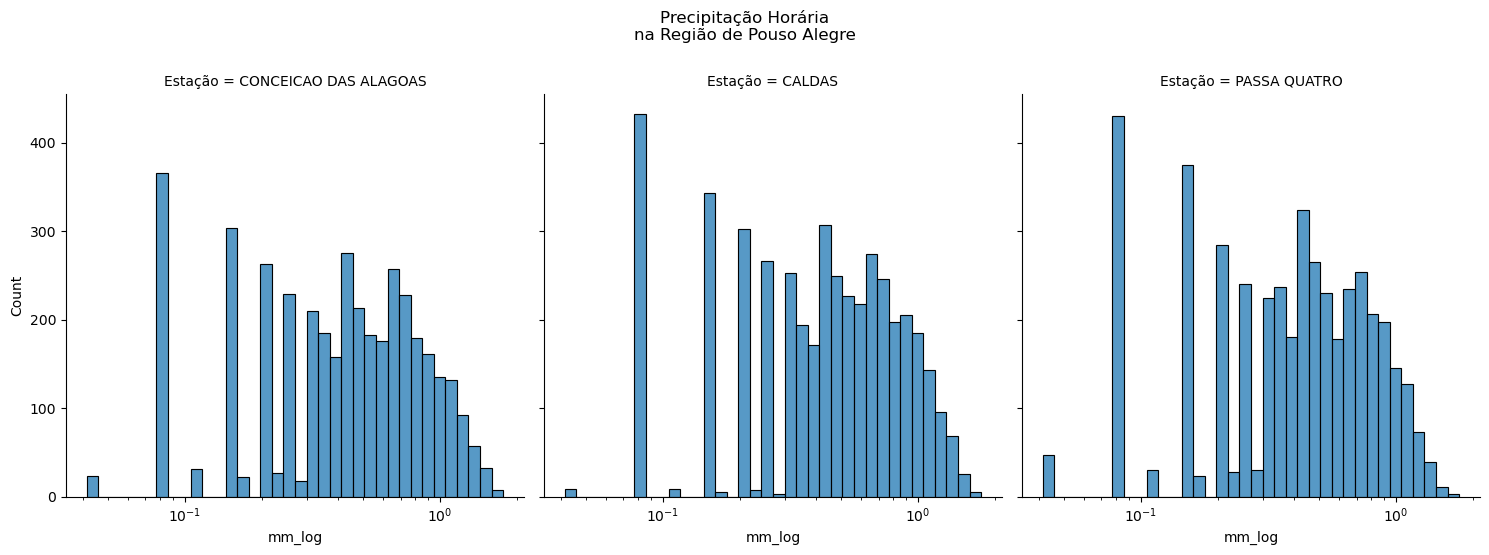

In [28]:
import numpy as np
k=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.mm>0]
k['mm_log']=np.log10(k.mm)
k=k[k.mm_log>0]
sns.displot(data=k,x='mm_log',log_scale=True,col='Estação')\
.fig.suptitle('Precipitação Horária\n\
na Região de Pouso Alegre',y=1.1)
plt.show()

In [29]:
k=k[k.mm_log>10**-0.7]
10**-0.7

0.19952623149688797

Os dados não parecem normalmente distribuidos. Os demais dados meteorológicos poderão servir para identificar clusters de chuvas e auxiliar normalização. Porém isso não será feito agora. SErão descartadas as ocorrencias de mm_log menor que 10**0.07.

In [30]:
chuvas_m_r_pa_clean=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.mm>k.mm.min()]

Agrupando para igualar a unidade de tempo com os demais dados do projeto.

In [31]:
chuvas_m_r_pa_clean.head(1)

,Estação,Data,Hora,mm,CO_ANO,CO_MES,Dia
127924,CONCEICAO DAS ALAGOAS,2008-01-02,4,1.8,2008,1,2


In [32]:
chuvas_m_r_pa_clean=chuvas_m_r_pa_clean.groupby(by=['Estação','CO_ANO','CO_MES'])['mm'].sum().reset_index()
chuvas_m_r_pa_clean['Data']=pd.to_datetime(chuvas_m_r_pa_clean.CO_ANO.astype(str)+'/'+chuvas_m_r_pa_clean.CO_MES.astype(str)+'/1')
chuvas_m_r_pa_clean.head()

,Estação,CO_ANO,CO_MES,mm,Data
0,CALDAS,2008,1,332.6,2008-01-01
1,CALDAS,2008,2,124.2,2008-02-01
2,CALDAS,2008,3,271.4,2008-03-01
3,CALDAS,2008,4,194.4,2008-04-01
4,CALDAS,2008,5,33.2,2008-05-01


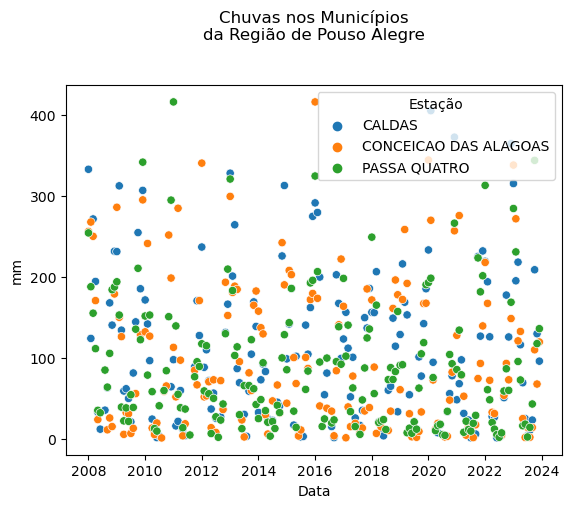

In [33]:
sns.scatterplot(data=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.mm>0],x='Data',y='mm', hue='Estação').set_title('Chuvas nos Municípios\nda Região de Pouso Alegre',y=1.1)
plt.show()

Visualmente da para conferir que não ouve interrupção e há compatibilidade de valores entre as estações meteorológicas.

In [34]:
chuvas_m_r_pa_clean.groupby('Estação').Data.min()

Estação
CALDAS                  2008-01-01
CONCEICAO DAS ALAGOAS   2008-01-01
PASSA QUATRO            2008-01-01
Name: Data, dtype: datetime64[ns]

In [35]:
chuvas_m_r_pa_clean=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.Data>=chuvas_m_r_pa_clean[chuvas_m_r_pa_clean.Estação=="PASSA QUATRO"].Data.min()]

In [36]:
chuvas_m_r_pa_clean.groupby('Estação').Data.min()

Estação
CALDAS                  2008-01-01
CONCEICAO DAS ALAGOAS   2008-01-01
PASSA QUATRO            2008-01-01
Name: Data, dtype: datetime64[ns]

In [37]:
chuvas_m_r_pa_clean.head(1)

,Estação,CO_ANO,CO_MES,mm,Data
0,CALDAS,2008,1,332.6,2008-01-01


In [38]:
chuvas_m_r_pa_clean.duplicated(subset=['CO_ANO','CO_MES','Estação','Data']).sum()

0

In [39]:
chuvas_m_r_pa_clean.to_csv('~/git/comex_sh_mun/temp/chuvas_m_r_pa_clean.csv',index=False)